In [1]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore
import arviz as az   # type: ignore


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
# ### Exercise 1 (max 5 points)
#
# The file [Howell1](./Howell1.csv) (source: https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv) contains data about a population of men and women: it records their height (in cm), weight (in kg), age (in years), and a binary variable for the gender (1 is male); fields are separated by `;`. Unfortunately, the records mixed up American and European conventions for decimal numbers: sometimes the values are recorded with the decimal point, sometimes with the decimal comma. 
#
# Load the data in a pandas dataframe, but be sure to get them correctly interpreted. Several strategies are possibile: you can fix the data and load them with pandas, or you can load them as strings and convert them to floats when you already have the data in the dataframe: at the end you are required to have a dataframe with a proper float `dtype`.



In [3]:
#data = pd.read_csv('Howell1.csv')

In [4]:
def convert_to_float(value):
    try:
        return float(value.replace(",", "."))
    except:
        return value

df = pd.read_csv("./Howell1.csv", sep=";", decimal=",")
df = df.applymap(convert_to_float)
df = df.astype({"height": float, "weight": float, "age": float})

In [ ]:
# ### Exercise 2 (max 2 points)
#
# Plot a histogram of the "age" values.

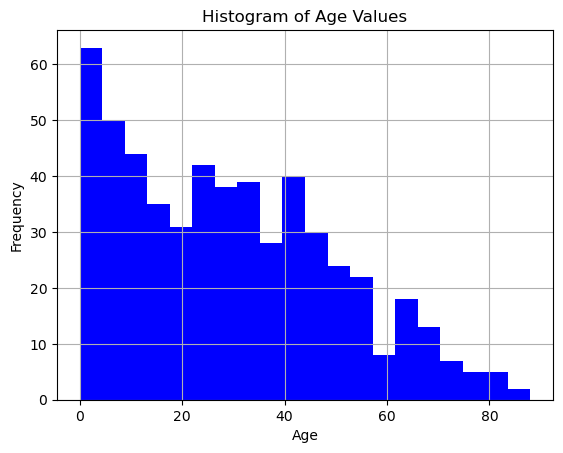

In [6]:
df["age"].hist(bins=20, color="blue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Values")
plt.show()

In [ ]:
# ### Exercise 3 (max 3 points)
#
# Make a figure with two columns of plots. In the first column plot together (contrast) the histograms of 'age' for males and females. In the second column plot the histograms of 'age' for people taller than 1.2m, again contrasting male to females. Use density histograms to make the diagrams easy to compare; add proper titles and legends.
#

C:\Users\shwet\AppData\Local\Temp\ipykernel_10464\317393200.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["height"] > 120][df["male"] == 1]["age"].hist(bins=20, color="blue", alpha=0.5, density=True, ax=axs[1])
C:\Users\shwet\AppData\Local\Temp\ipykernel_10464\317393200.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["height"] > 120][df["male"] == 0]["age"].hist(bins=20, color="red", alpha=0.5, density=True, ax=axs[1])


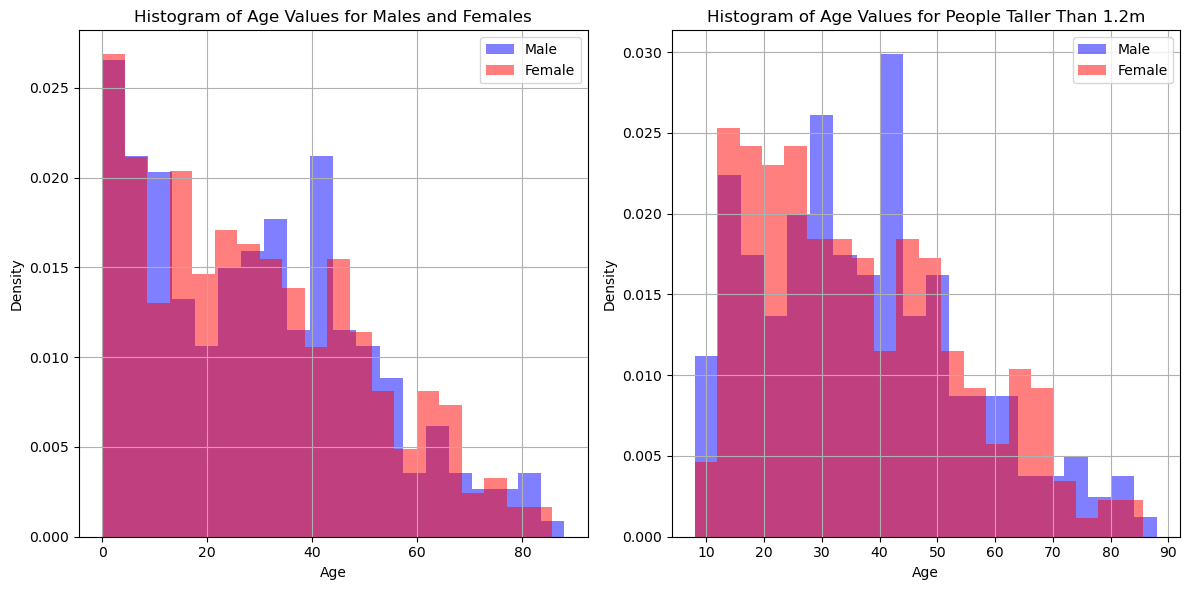

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First column: histograms of age for males and females
df[df["male"] == 1]["age"].hist(bins=20, color="blue", alpha=0.5, density=True, ax=axs[0])
df[df["male"] == 0]["age"].hist(bins=20, color="red", alpha=0.5, density=True, ax=axs[0])
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Density")
axs[0].set_title("Histogram of Age Values for Males and Females")
axs[0].legend(["Male", "Female"])

# Second column: histograms of age for people taller than 1.2m
df[df["height"] > 120][df["male"] == 1]["age"].hist(bins=20, color="blue", alpha=0.5, density=True, ax=axs[1])
df[df["height"] > 120][df["male"] == 0]["age"].hist(bins=20, color="red", alpha=0.5, density=True, ax=axs[1])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Density")
axs[1].set_title("Histogram of Age Values for People Taller Than 1.2m")
axs[1].legend(["Male", "Female"])

plt.tight_layout()
plt.show()


In [ ]:
# ### Exercise 4 (max 2 points)
#
# Add a column `w_dens` with the ratio between weight and height.


In [12]:
df['w_dens']=df['weight']/(df['height'] / 100)**2 #formula for weight density
df

,height,weight,age,male,w_dens
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
...,...,...,...,...,...
539,145.415,31.127751,17.0,1,14.720729
540,162.560,52.163080,31.0,1,19.739486
541,156.210,54.062497,21.0,0,22.155341
542,71.120,8.051258,0.0,1,15.917698


In [ ]:
 ### Exercise 5 (max 3 points)
#
# Make a scatterplot of `w_dens` vs. `age`; in the plot the point corresponding to males should be appear in blue, the points corresponding to female in red.
#
#

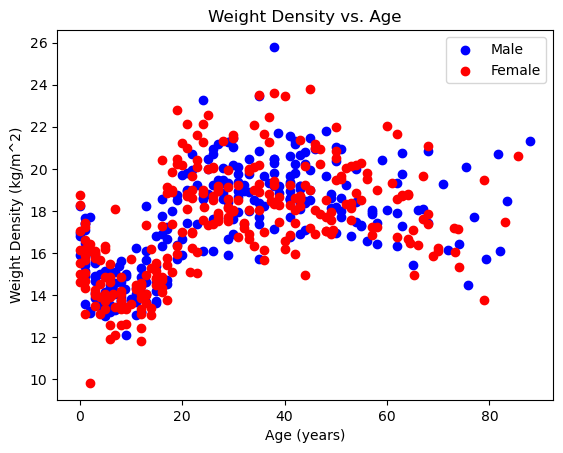

In [14]:
import matplotlib.pyplot as plt

male = df[df['male'] == 1]
female = df[df['male'] == 0]

plt.scatter(male['age'], male['w_dens'], c='blue', label='Male')
plt.scatter(female['age'], female['w_dens'], c='red', label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Weight Density (kg/m^2)')
plt.legend()
plt.title('Weight Density vs. Age')
plt.show()


In [ ]:
# ### Exercise 6 (max 7 points)
#
# Define a function `w_dens_by_gender` that takes an age and a boolean value. If the boolean is true, the function should return the age divided by 100 if the age is less or equal to 30, or .30 if the age is greater than 30. If the boolean value is false, the function should return the age divided by 110, if the age is less or equal to 25, or .23 if the age is greater than 25.
# For example, if the parameters are 15 and `True`, the function should return 0.15.
#
# To get the full marks, you should declare correctly the type hints and add a test within a doctest string.


In [43]:
def w_dens_by_gender(age: int, n: bool) -> float:
    """
    Returns weight density based on gender and age.
    
    :param age: An integer representing the age of the person.
    :param n: A boolean value representing the gender. True for male, False for female.
    :return: A float representing the weight density.
    
    Example:
    >>> w_dens_by_gender(45, True)
    0.3
    
    >>> w_dens_by_gender(15, True)
    0.15
    """
    if n:
        if age <= 30:
            return age / 100
        else:
            return 0.30
    else:
        if age <= 25:
            return age / 110
        else:
            return 0.25


In [44]:
w_dens_by_gender(15,True)




0.15

In [ ]:
# ### Exercise 7 (max 5 points)
#
# Add a column `expected_w_dens` that combine the columns `age` and `male` with the function `w_dens_by_gender`.
#
# To get the full marks avoid the use of explicit loops.
#

In [45]:
df['expected_w_dens']=df.apply(lambda x: w_dens_by_gender(x['age'], x['male']), axis=1)



In [ ]:

# ### Exercise 8 (max 5 points)
#
# Consider this statistical model:
#
# - the error `expected_w_dens` - `w_dens` is normally distributed, with (unknown) mean $\mu$ and (unknown) standard deviation $\sigma$
# - $\mu$ is normally distributed with mean $=0$ and standard deviation $=5$
# - $\sigma$ is exponentially distributed with $\lambda = 1$
#
# Code this model with pymc3, sample the model, and print the summary of the resulting estimation by using `az.summary`.

In [46]:
import pymc3 as pm

with pm.Model() as model:
    mu_mean = 0
    mu_sd = 5
    sigma_lambda = 1
    
    mu = pm.Normal('mu', mu=mu_mean, sd=mu_sd)
    sigma = pm.Exponential('sigma', lam=sigma_lambda)
    w_dens = pm.Normal('w_dens', mu=mu, sd=sigma)
    trace = pm.sample(300, tune=200)
    
    
az.summary(trace)

C:\Users\shwet\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\shwet\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\shwet\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_dens, sigma, mu]


Sampling 4 chains for 200 tune and 300 draw iterations (800 + 1_200 draws total) took 56 seconds.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5071093108054426, but should be close to 0.8. Try to increase the number of tuning steps.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\shwet\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the mod

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.092,4.597,-9.569,8.605,0.381,0.270,147.0,144.0,1.04
w_dens,-0.115,4.828,-9.313,9.611,0.412,0.292,138.0,170.0,1.04
sigma,1.315,0.960,0.321,3.116,0.087,0.062,53.0,61.0,1.06
